### Neural Network - Two Hidden Layers

In [1]:

# Import our dependencies
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd
import tensorflow as tf
from pathlib import Path

In [2]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
def preprocessFile(filename = Path('../Data/AdultCensusUpdated.csv')):
    
    print(f'Preprocessing file {filename}')
    dtype_mapper = {'age': 'int64',
                    'workclass': 'string',
                    'fnlwgt': 'int64',
                    'education': 'string',
                    'education.num': 'int64',
                    'marital.status': 'string',
                    'occupation': 'string',
                    'relationship': 'string',
                    'race': 'string',
                    'sex': 'string',
                    'capital.gain': 'int64',
                    'capital.loss': 'int64',
                    'hours.per.week': 'int64',
                    'native.country': 'string',
                    'income': 'string',
                    'State': 'string'}
    df = pd.read_csv(filename, dtype=dtype_mapper, na_values='?')    
    df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'state']
    df.income = df.income.apply(lambda x: '0' if x == '<=50K' else '1')
    df.income = df.income.astype('int64')
    df = df.drop(['fnlwgt',
                  'education', 
                #   'state',
                  'capital_gain', 
                  'capital_loss',
                  'native_country'], axis=1)
    df = df.dropna()
    return df

census_df = preprocessFile()
census_df.sample(10)

Preprocessing file ..\Data\AdultCensusUpdated.csv


,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,income,state
11539,28,Private,9,Never-married,Craft-repair,Unmarried,White,Male,40,0,Wyoming
27136,18,Private,10,Never-married,Other-service,Own-child,White,Female,20,0,Arkansas
24214,25,Private,10,Divorced,Tech-support,Not-in-family,White,Female,40,0,Colorado
18044,40,State-gov,13,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,40,0,Alaska
27764,22,Private,10,Never-married,Prof-specialty,Other-relative,Asian-Pac-Islander,Female,20,0,New Hampshire
1609,39,Private,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,55,1,South Carolina
29334,39,Private,9,Married-civ-spouse,Craft-repair,Husband,White,Male,40,0,North Dakota
26277,27,Private,9,Married-civ-spouse,Other-service,Wife,White,Female,40,1,Idaho
29046,31,Private,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,40,0,Illinois
9208,30,Private,7,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,0,Rhode Island


In [4]:
y = census_df.income

X = census_df.copy()
X.drop('income', axis=1, inplace=True)


In [5]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply Label Encoding to each non-numeric column
for col in X.select_dtypes(include=["string"]).columns:
    X[col] = label_encoder.fit_transform(X[col])

X.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,state
1,82,2,9,6,3,1,4,0,18,19
3,54,2,4,0,6,4,4,0,40,11
4,41,2,10,5,9,3,4,0,40,8
5,34,2,9,0,7,4,4,0,45,8
6,38,2,6,5,0,4,4,1,40,4


In [6]:
# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create a StandardScaler instances
scaler = StandardScaler()

# Create scaler instance
X_scaler = scaler.fit(X_train)

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
X_train

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,state
20085,56,2,9,2,6,0,4,1,40,16
24330,45,2,9,0,0,4,4,0,28,24
5560,26,5,9,0,0,3,4,0,30,36
16498,28,2,10,4,13,1,4,1,50,31
14880,51,2,9,2,10,0,4,1,40,36
...,...,...,...,...,...,...,...,...,...,...
18299,62,0,9,6,0,4,4,0,40,31
5454,48,2,9,6,7,4,4,0,40,8
12883,48,2,13,0,7,4,4,0,56,49
252,26,2,10,2,0,0,4,1,40,24


In [8]:
# Define the deep learning model 
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  64
hidden_nodes_layer2 = 32

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Compile the model
# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=10, batch_size=32)


Epoch 1/10
720/720 [==============================] - 1s 869us/step - loss: 0.3994 - accuracy: 0.8119
Epoch 2/10
720/720 [==============================] - 1s 839us/step - loss: 0.3671 - accuracy: 0.8269
Epoch 3/10
720/720 [==============================] - 1s 791us/step - loss: 0.3624 - accuracy: 0.8301
Epoch 4/10
720/720 [==============================] - 1s 753us/step - loss: 0.3601 - accuracy: 0.8297
Epoch 5/10
720/720 [==============================] - 1s 832us/step - loss: 0.3581 - accuracy: 0.8315
Epoch 6/10
720/720 [==============================] - 1s 754us/step - loss: 0.3560 - accuracy: 0.8308
Epoch 7/10
720/720 [==============================] - 1s 787us/step - loss: 0.3546 - accuracy: 0.8319
Epoch 8/10
720/720 [==============================] - 1s 778us/step - loss: 0.3533 - accuracy: 0.8328
Epoch 9/10
720/720 [==============================] - 1s 826us/step - loss: 0.3516 - accuracy: 0.8335
Epoch 10/10
720/720 [==============================] - 1s 757us/step - loss: 0.351

In [11]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

240/240 - 0s - loss: 0.3708 - accuracy: 0.8263 - 283ms/epoch - 1ms/step
Loss: 0.370804101228714, Accuracy: 0.8263021111488342


240/240 [==============================] - 0s 571us/step


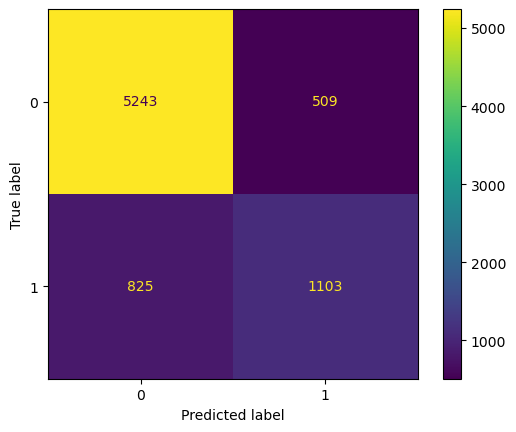

In [12]:
y_predictions = nn.predict(X_test_scaled)
y_predictions = tf.squeeze(y_predictions)
y_predictions_binary = np.array([1 if x >= 0.5 else 0 for x in y_predictions])
actual = np.array(y_test)
cm = confusion_matrix(actual, y_predictions_binary)
displ = ConfusionMatrixDisplay(confusion_matrix=cm)
displ.plot()


In [13]:
y_predictions_binary

array([1, 1, 1, ..., 0, 0, 0])

In [14]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_predictions_binary, normalize='pred')
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_predictions_binary)

In [15]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_predictions_binary))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,0.864041,0.315757
Actual 1,0.135959,0.684243


Accuracy Score : 0.8263020833333333
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      5752
           1       0.68      0.57      0.62      1928

    accuracy                           0.83      7680
   macro avg       0.77      0.74      0.76      7680
weighted avg       0.82      0.83      0.82      7680



### Add Test Results to Original Dataframe

In [ ]:
X_test['Results'] = y_predictions_binary
X_test['Model'] = 'Sequential NN'

# Drop unnecessary columns
X_test = X_test.drop(columns = ['age', 'workclass', 'education_num', 'marital_status', 'occupation', 
            'relationship', 'race', 'sex', 'hours_per_week', 'state'])

X_test.head()

,Results,Model
3314,1,Sequential NN
19677,1,Sequential NN
29448,1,Sequential NN
3581,0,Sequential NN
25490,0,Sequential NN


In [18]:
# Copy original reprocess dataset
census_copy_df = census_df.copy()

#Join result data to original
census_copy_df = census_copy_df.join(X_test)
census_copy_df = census_copy_df.dropna(axis=0, how='any')
census_copy_df.head(20)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,income,state,Results,Model
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,0,Maryland,0.0,Sequential NN
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,0,Florida,0.0,Sequential NN
13,32,Private,14,Separated,Exec-managerial,Not-in-family,White,Male,55,1,New Hampshire,0.0,Sequential NN
16,45,Private,7,Divorced,Transport-moving,Not-in-family,White,Male,76,1,Wyoming,0.0,Sequential NN
22,61,Private,9,Divorced,Sales,Unmarried,White,Female,25,0,New York,0.0,Sequential NN
26,33,Private,2,Married-civ-spouse,Craft-repair,Not-in-family,White,Male,32,0,Colorado,0.0,Sequential NN
27,49,Private,3,Married-civ-spouse,Other-service,Husband,White,Male,40,0,Montana,0.0,Sequential NN
28,37,Self-emp-inc,6,Never-married,Transport-moving,Not-in-family,White,Male,50,1,Colorado,0.0,Sequential NN
30,23,Private,10,Separated,Other-service,Not-in-family,White,Male,40,1,New York,0.0,Sequential NN
36,53,Private,9,Never-married,Sales,Not-in-family,White,Male,48,1,Utah,0.0,Sequential NN


In [19]:
# Export
census_copy_df.to_csv('../Data/SequentialNN.csv', index_label='index')
